# Geminga light curve with poisson representation

In [9]:
%matplotlib inline
from importlib import reload
import main, light_curve
import corner
import warnings
warnings.filterwarnings('error')

### load all data

In [10]:
%%time 
data = main.Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='../data/geminga_weights.pkl')

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
CPU times: user 1min 9s, sys: 12.7 s, total: 1min 22s
Wall time: 1min 15s


#### Create a BinnedWeights object 

In [11]:
bw=data.binned_weights()

Binning: 3650 intervals of 1 days from 54683.00 to 58333.00


#### Now pass that to the LightCurve class, which does fitting

In [17]:
reload(light_curve)
lc = light_curve.LightCurve(bw, rep='poiss'); 

Loaded 3562 / 3650 cells with exposure > 0.3 for light curve analysis


In [18]:
%time lc.fit()

Fit 3562 intervals: columns (t, exp, flux, errors, limit, ts, funct) in a DataFrame.
CPU times: user 33.9 s, sys: 56 ms, total: 34 s
Wall time: 34.1 s


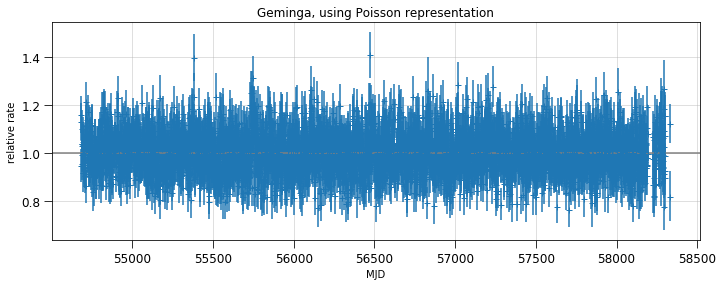

In [19]:
lc.flux_plot(title='Geminga, using Poisson representation')

In [20]:
df = lc.fit_df
# compute average error and pull
df.loc[:,'error']=df.errors.apply(lambda x: 0.5*(x[0]+x[1]))
df.loc[:,'pull']=(df.flux-1)/df.error

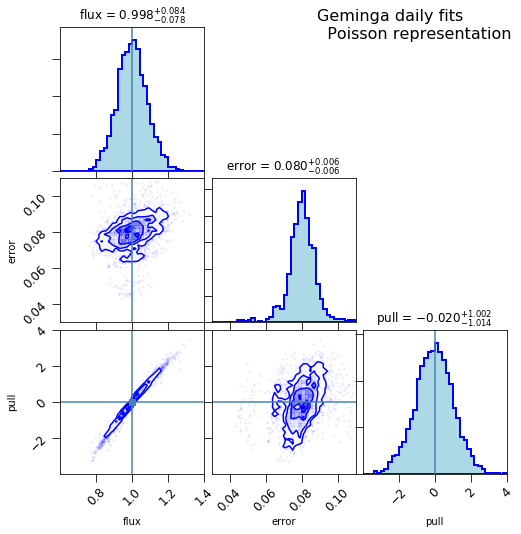

In [21]:
corner.corner(df['flux error pull'.split()], bins=40, 
              range=[(0.6,1.4), (0.03,0.11),(-4,4)],
              color='blue',show_titles=True, truths=(1.0,None, 0), title_fmt='.3f', 
              hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue', log=False));
plt.gcf().suptitle('Geminga daily fits\n  Poisson representation', x=0.6, ha='left', fontsize=16);